### Introduction

The following code enables analysis of a queueing network. The structure of the network and the model parameters (arrival rates, service times, capacities, distributions) can be specified in the input files.<br />
Please refer to the folder structure in the Python environment we shared with you ahead of this workshop:<br />
- the current Jupyter notebook should be in the same folder as the folders "functions" and "data"
- the folder "functions" contains all the Python code needed to run the simulations we see in this workshop
- the folder "data" contains input/output files - for each analysis, a sub-folder must be created in here named after the "analysisID", with further sub-folders named "input" and "output" which will be described during the workshop

### 0) Import packages and functions

In [1]:
#Reload functions every time
%load_ext autoreload
%autoreload 2

#Tell Python where to read our simulator from (folder "functions" in the current directory)
import sys
sys.path.insert(0, 'functions')

#Load the simulator into the current Python session
import queue_network_simulator as qns  #all functions enabling simulation
import plotting_functions as pf  #all functions enabling analysis and storage of results


### 1) Simulation parameters

In [2]:
#Location of input/output files
analysisID = "mass_vacc_baseline"
analysis_location = "data"

#Simulation parameters
number_of_runs = 20  #How many times we want to run the simulator
warm_up_duration = 24  #How many time units should the simulator "warm up" in order to reach numerical stability
sim_duration = 168  #How many time units should the actual simulation last (excluding warm-up)
plot_length = 168  #How many time units of the simulation we want to plot in the results


### 3) Read input data about the model

All this information is provided via the txt files in the "input" folder of the current analysis.

In [3]:
#We use the function read_input() from the module "qns" to store input data into Python variables
#We need to specify where data should be read from
model_parameters = qns.read_input(analysisID,analysis_location)


Let's also have a look at how the parameters are stored into Python variables

In [4]:
model_parameters

{'trajectories': {'traj1':     step service_time_distribution length_of_need
  0  admin                 lognormal     0.05;0.005,
  'traj2':     step service_time_distribution length_of_need
  0  admin                 lognormal     0.05;0.005
  1   clin                 lognormal   0.083;0.0083,
  'traj3':     step service_time_distribution length_of_need
  0  admin                 lognormal     0.05;0.005
  1   clin                 lognormal   0.083;0.0083
  2  vaccA                 lognormal   0.083;0.0083,
  'traj4':     step service_time_distribution length_of_need
  0  admin                 lognormal     0.05;0.005
  1   clin                 lognormal   0.083;0.0083
  2  vaccB                 lognormal   0.117;0.0117},
 'node_ids': 0    admin
 1     clin
 2    vaccA
 3    vaccB
 Name: step, dtype: object,
 'node_names': {'admin': 'HA',
  'clin': 'clinician',
  'vaccA': 'nurseA',
  'vaccB': 'nurseB'},
 'capacities': {'admin': 5, 'clin': 7, 'vaccA': 2, 'vaccB': 5},
 'node_cost_per_ti

In [5]:
model_parameters["trajectories"]

{'traj1':     step service_time_distribution length_of_need
 0  admin                 lognormal     0.05;0.005,
 'traj2':     step service_time_distribution length_of_need
 0  admin                 lognormal     0.05;0.005
 1   clin                 lognormal   0.083;0.0083,
 'traj3':     step service_time_distribution length_of_need
 0  admin                 lognormal     0.05;0.005
 1   clin                 lognormal   0.083;0.0083
 2  vaccA                 lognormal   0.083;0.0083,
 'traj4':     step service_time_distribution length_of_need
 0  admin                 lognormal     0.05;0.005
 1   clin                 lognormal   0.083;0.0083
 2  vaccB                 lognormal   0.117;0.0117}

### 4) Run simulation

In [6]:
raw_data = {}  #We initialise the raw output object as an empty "dictionary" (unordered list)

for r in range(number_of_runs):  #Letting the iterator r vary across the number of runs
    print(f"Run {r+1} of {number_of_runs}")
    my_model = qns.PathwayModel(r, model_parameters, warm_up_duration, sim_duration) #Build a model instance for the current run
    my_model.run(r) #Run the simulation
    raw_data[r+1] = my_model.output #Store the results as a new element in raw_data
    print()
 

Run 1 of 20

Run 2 of 20

Run 3 of 20

Run 4 of 20

Run 5 of 20

Run 6 of 20

Run 7 of 20

Run 8 of 20

Run 9 of 20

Run 10 of 20

Run 11 of 20

Run 12 of 20

Run 13 of 20

Run 14 of 20

Run 15 of 20

Run 16 of 20

Run 17 of 20

Run 18 of 20

Run 19 of 20

Run 20 of 20



### 5) Plot and save results

#### Exploring the behaviour of the model to understand how long our simulation experiment should last

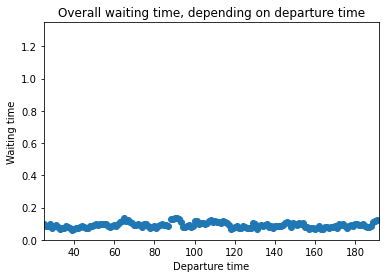

In [18]:
plot_from = warm_up_duration + 1
plot_to = warm_up_duration + plot_length

time_transformation = 1

pf.plot_wait_over_time(raw_data, plot_from, plot_to, analysisID, analysis_location, time_transformation)


#### Distribution of overall patient waiting time (across the whole network, and excluding service times)

Expected overall waiting time: 0.09


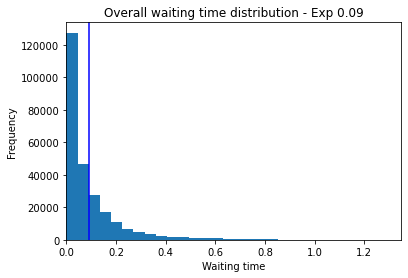

In [17]:
plot_from = warm_up_duration + 1
plot_to = warm_up_duration + plot_length

time_transformation = 1
hist_bins = 30

pf.plot_total_waiting_time(raw_data, plot_from, plot_to, analysisID, analysis_location, time_transformation, hist_bins)


#### Distribution of overall time spent in the whole system by patients (across the whole network, including service times)

Expected time spent in the system: 0.29


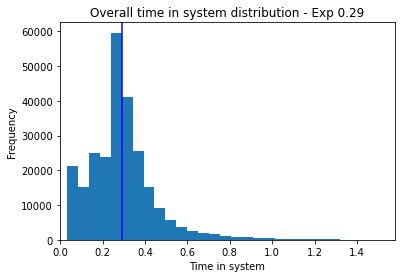

In [15]:
plot_from = warm_up_duration + 1
plot_to = warm_up_duration + plot_length

time_transformation = 1
hist_bins = 30

pf.plot_overall_time_in_system(raw_data, plot_from, plot_to, analysisID, analysis_location, time_transformation, hist_bins)


#### Performance target (% of patients leaving the system within X hours)

Proportion of patients leaving within target time: 92.17 %


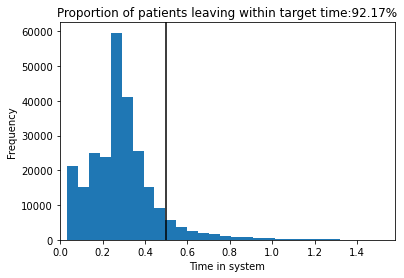

In [13]:
#Note, the black vertical line in the plot is the target
plot_from = warm_up_duration + 1
plot_to = warm_up_duration + plot_length

time_transformation = 1
hist_bins = 30

performance_target = 0.5 #target for overall time in the system (e.g. max 4 hours)

pf.plot_performance(raw_data, performance_target, plot_from, plot_to, analysisID, analysis_location, time_transformation, hist_bins)


#### Distribution of patient waiting time at each step in the network

Expected waiting time at admin : 0.02


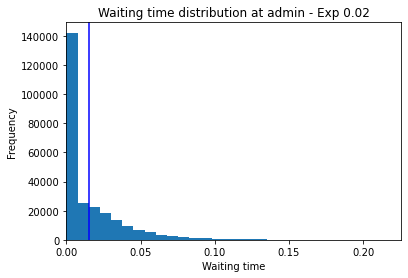

Expected waiting time at clin : 0.02


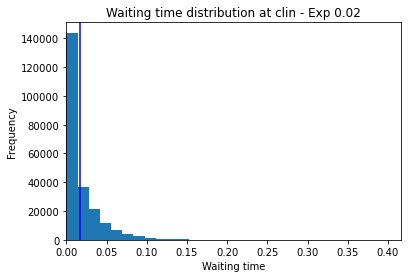

Expected waiting time at vaccA : 0.16


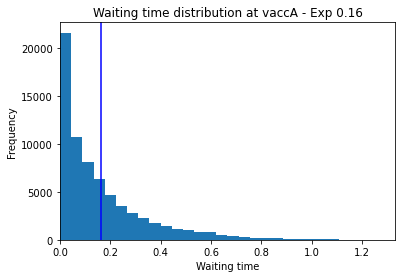

Expected waiting time at vaccB : 0.04


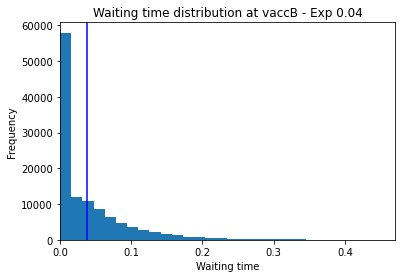

In [14]:
plot_from = warm_up_duration + 1
plot_to = warm_up_duration + plot_length

time_transformation = 1
hist_bins = 30

for node_iter in my_model.node_ids:
    pf.plot_waiting_time(raw_data, node_iter, plot_from, plot_to, analysisID, analysis_location, time_transformation, hist_bins)
